<div style='background-image: url("../share/header_no_text.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Handling Event Metadata</div>
        </div>
    </div>
</div>

Seismo-Live: http://seismo-live.org

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))
---

![](images/obspy_logo_full_524x179px.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

- for event metadata, the de-facto standard is [QuakeML (an xml document structure)](https://quake.ethz.ch/quakeml/)
- QuakeML files can be read using **`read_events()`**

In [2]:
from obspy import read_events

catalog = read_events("./data/event_tohoku_with_big_aftershocks.xml")
print(catalog)

5 Event(s) in Catalog:
2011-03-11T05:46:23.200000Z | +38.296, +142.498 | 9.1 MW
2011-03-11T06:15:37.570000Z | +36.227, +141.088 | 7.9 MW
2011-03-11T06:25:50.740000Z | +38.051, +144.630 | 7.6 MW
2011-04-07T14:32:43.290000Z | +38.276, +141.588 | 7.1 MW
2011-07-10T00:57:10.800000Z | +38.034, +143.264 | 7.0 MW


- **`read_events()`** function returns a **`Catalog`** object, which is
a collection of **`Event`** objects.

In [3]:
print(type(catalog))
print(type(catalog[0]))

<class 'obspy.core.event.catalog.Catalog'>
<class 'obspy.core.event.event.Event'>


In [4]:
event = catalog[0]
print(event)

Event:	2011-03-11T05:46:23.200000Z | +38.296, +142.498 | 9.1 MW

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=3279407")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=9933375")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=16642444")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


- Event objects are again collections of other resources.
- the nested ObsPy Event class structure (Catalog/Event/Origin/Magnitude/FocalMechanism/...) is closely modelled after QuakeML
<img src="images/Event.svg" width=90%>

In [5]:
print(type(event.origins))
print(type(event.origins[0]))
print(event.origins[0])

<class 'list'>
<class 'obspy.core.event.origin.Origin'>
Origin
	   resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=9933375")
	          time: UTCDateTime(2011, 3, 11, 5, 46, 23, 200000)
	     longitude: 142.498
	      latitude: 38.2963
	         depth: 19700.0
	 creation_info: CreationInfo(author='ISC')


In [6]:
print(type(event.magnitudes))
print(type(event.magnitudes[0]))
print(event.magnitudes[0])

<class 'list'>
<class 'obspy.core.event.magnitude.Magnitude'>
Magnitude
	    resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=16642444")
	            mag: 9.1
	 magnitude_type: 'MW'
	      origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=9933383")
	  creation_info: CreationInfo(author='GCMT')


In [7]:
# try event.<Tab> to get an idea what "children" elements event has

- The Catalog object contains some convenience methods to make
working with events easier.
- for example, the included events can be filtered with various keys.

In [8]:
largest_magnitude_events = catalog.filter("magnitude >= 7.8")
print(largest_magnitude_events)

2 Event(s) in Catalog:
2011-03-11T05:46:23.200000Z | +38.296, +142.498 | 9.1 MW
2011-03-11T06:15:37.570000Z | +36.227, +141.088 | 7.9 MW


- There is a basic preview plot using the matplotlib basemap module.

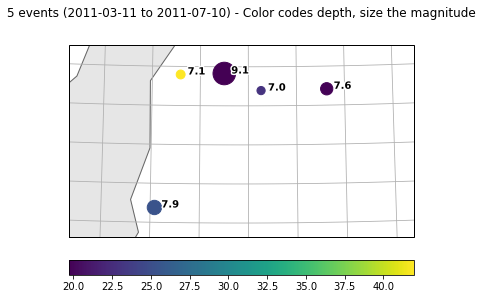

In [9]:
catalog.plot(projection="local");

- a (modified) Catalog can be output to file (currently there is write support for QuakeML only)

In [10]:
largest_magnitude_events.write("/tmp/large_events.xml", format="QUAKEML")
!ls -l /tmp/large_events.xml

-rw-r--r--  1 lion  wheel  3182 Feb 17 00:53 /tmp/large_events.xml


- the event type classes can be used to build up Events/Catalogs/Picks/.. from scratch in custom processing work flows and to share them with other researchers in the de facto standard format QuakeML

In [11]:
from obspy import UTCDateTime
from obspy.core.event import Catalog, Event, Origin, Magnitude
from obspy.geodetics import FlinnEngdahl

cat = Catalog()
cat.description = "Just a fictitious toy example catalog built from scratch"

e = Event()
e.event_type = "not existing"

o = Origin()
o.time = UTCDateTime(2014, 2, 23, 18, 0, 0)
o.latitude = 47.6
o.longitude = 12.0
o.depth = 10000
o.depth_type = "operator assigned"
o.evaluation_mode = "manual"
o.evaluation_status = "preliminary"
o.region = FlinnEngdahl().get_region(o.longitude, o.latitude)

m = Magnitude()
m.mag = 7.2
m.magnitude_type = "Mw"

m2 = Magnitude()
m2.mag = 7.4
m2.magnitude_type = "Ms"

# also included could be: custom picks, amplitude measurements, station magnitudes,
# focal mechanisms, moment tensors, ...

# make associations, put everything together
cat.append(e)
e.origins = [o]
e.magnitudes = [m, m2]
m.origin_id = o.resource_id
m2.origin_id = o.resource_id

print(cat)
cat.write("/tmp/my_custom_events.xml", format="QUAKEML")
!cat /tmp/my_custom_events.xml

1 Event(s) in Catalog:
2014-02-23T18:00:00.000000Z | +47.600,  +12.000 | 7.2 Mw | manual
<?xml version='1.0' encoding='utf-8'?>
<q:quakeml xmlns:q="http://quakeml.org/xmlns/quakeml/1.2" xmlns="http://quakeml.org/xmlns/bed/1.2">
  <eventParameters publicID="smi:local/df3b1812-d41b-40e5-a5e2-6dd475f54d44">
    <description>Just a fictitious toy example catalog built from scratch</description>
    <event publicID="smi:local/b660d597-fce6-47f8-8892-b342f55e6409">
      <type>not existing</type>
      <origin publicID="smi:local/266b668f-5ec7-41ae-b236-a76423ac4dbc">
        <time>
          <value>2014-02-23T18:00:00.000000Z</value>
        </time>
        <latitude>
          <value>47.6</value>
        </latitude>
        <longitude>
          <value>12.0</value>
        </longitude>
        <depth>
          <value>10000.0</value>
        </depth>
        <depthType>operator assigned</depthType>
        <region>AUSTRIA</region>
        <evaluationMode>manual</evaluationMode>
        <ev